In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train = pd.read_csv("spaceship_titanic_train.csv")

In [3]:
df_train.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7836,8366_02,Earth,False,NaN,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,NaN,False
1042,1110_02,Europa,False,C/42/S,55 Cancri e,26.0,False,8.0,6138.0,0.0,3.0,754.0,Batomam Ennalve,True
3630,3903_05,Earth,False,F/804/P,TRAPPIST-1e,56.0,False,967.0,0.0,0.0,3.0,0.0,Tricky Doughan,False
6541,6905_02,Earth,False,E/460/S,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,938.0,44.0,Lilasa Acobson,False
5805,6141_01,Earth,False,F/1174/S,PSO J318.5-22,17.0,False,0.0,20.0,0.0,14.0,884.0,Natald Haydenzier,False


In [4]:
df_train.shape

(8693, 14)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
# Data Cleaning
# Drop name of clients
cleaned_training_set = df_train.drop('Name', axis=1)


In [8]:
cleaned_training_set.drop('PassengerId', axis=1, inplace = True)

In [9]:
# Handle missing/null values
# Delete all rows with missing planet names as data is too crucial to use a probable value.
cleaned_training_set.dropna(
    subset=['HomePlanet','VRDeck','Spa','ShoppingMall', 'FoodCourt', 'RoomService', 'VIP','Cabin', 'CryoSleep'],
                            inplace = True)

In [10]:
nulls = cleaned_training_set['HomePlanet'].isnull()
if nulls.values.any():
    # get the index of the row where the null value is located
    row_index = nulls[nulls == True].index[0]
    print(f'The null value in column HomePlanet is located in row {row_index}')
else:
    print('All null values in the column have been deleted')

All null values in the column have been deleted


In [11]:
print(cleaned_training_set.iloc[59])

HomePlanet             Mars
CryoSleep             False
Cabin                F/18/S
Destination     TRAPPIST-1e
Age                    27.0
VIP                   False
RoomService           147.0
FoodCourt               0.0
ShoppingMall         1018.0
Spa                     0.0
VRDeck                  0.0
Transported            True
Name: 71, dtype: object


In [12]:
#cleaned_training_set.dropna(subset=['HomePlanet'], inplace=True, index=[59])


In [13]:
# Fill the age and destination null values with their mode values 
cleaned_training_set['Age'] = cleaned_training_set['Age'].fillna(cleaned_training_set['Age'].mode()[0])
cleaned_training_set['Destination'] = cleaned_training_set['Destination'].fillna(cleaned_training_set['Destination'].mode()[0])


In [14]:
cleaned_training_set.isnull().any()

HomePlanet      False
CryoSleep       False
Cabin           False
Destination     False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Transported     False
dtype: bool

In [15]:
cleaned_training_set.shape

(7068, 12)

In [16]:
#Feature Engineering
# Object datatypes present. Addressing them using encoding
# CryoSleep, VIP, Transportion - one hot encoding method.
Homeplanet_encoded = pd.get_dummies(cleaned_training_set['HomePlanet'])
cleaned_training_set = pd.concat([cleaned_training_set, Homeplanet_encoded], axis=1)

In [17]:
Destination_encoded =  pd.get_dummies(cleaned_training_set['Destination'])
cleaned_training_set = pd.concat([cleaned_training_set, Destination_encoded], axis=1)

In [18]:
cleaned_training_set.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,0,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,0,0,0,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,0,0,1
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,0,0,1
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0,0,0,0,1


In [19]:
# Delete Homeplant since it has been encoded and store in a new dataframe
df_i = cleaned_training_set.drop('Destination', axis = 1 )

In [20]:
df_ii = df_i.drop('HomePlanet', axis = 1)


In [21]:
df1 = df_ii
df1.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,0,1
1,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,0,0,0,1
2,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,0,0,1
3,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,0,0,1
4,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0,0,0,0,1


In [22]:
print(df1)

     CryoSleep     Cabin   Age    VIP  RoomService  FoodCourt  ShoppingMall  \
0        False     B/0/P  39.0  False          0.0        0.0           0.0   
1        False     F/0/S  24.0  False        109.0        9.0          25.0   
2        False     A/0/S  58.0   True         43.0     3576.0           0.0   
3        False     A/0/S  33.0  False          0.0     1283.0         371.0   
4        False     F/1/S  16.0  False        303.0       70.0         151.0   
...        ...       ...   ...    ...          ...        ...           ...   
8688     False    A/98/P  41.0   True          0.0     6819.0           0.0   
8689      True  G/1499/S  18.0  False          0.0        0.0           0.0   
8690     False  G/1500/S  26.0  False          0.0        0.0        1872.0   
8691     False   E/608/S  32.0  False          0.0     1049.0           0.0   
8692     False   E/608/S  44.0  False        126.0     4688.0           0.0   

         Spa  VRDeck  Transported  Earth  Europa  M

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialise a LabelEncoder object
le = LabelEncoder()

df1['CryoSleep'] = le.fit_transform(df1['CryoSleep'])
df1['VIP'] = le.fit_transform(df1['VIP'])
df1['Transported'] = le.fit_transform(df1['Transported'])

df1.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
1,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1
2,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1
3,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1
4,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1


In [24]:
df1['Cabin'].unique()


array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [25]:
# Some important information may be derived from the Cabin class. 
# In the re-edit split the cabin using regex for now temporarily drop Cabin
df1 = df1.drop('Cabin', axis = 1)

In [26]:
df1.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1


In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
# Split the training data into initial training and test sets.
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Transported', axis = 1),
                                                   df1['Transported'],test_size=0.2,random_state=42)

gnb = GaussianNB()
# Training the model on the training set
gnb.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)



Accuracy: 0.7079207920792079


In [29]:
# Build the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Convert the matrix to a Dataframe for easier visualization
cm_df = pd.DataFrame(cm, columns=np.unique(y_test), index= np.unique(y_test))
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
print(cm_df)

Predicted    0    1
Actual             
0          327  354
1           59  674


In [30]:
# Decision Tree machine model
from sklearn.tree import DecisionTreeClassifier


In [31]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuray: {accuracy}")


Accuray: 0.7461103253182461


In [46]:
# Build the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Convert the matrix to a Dataframe for easier visualization
cm_df = pd.DataFrame(cm, columns=np.unique(y_test), index= np.unique(y_test))
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
print(cm_df)

Predicted    0    1
Actual             
0          487  194
1          165  568


In [47]:
from sklearn.tree import plot_tree

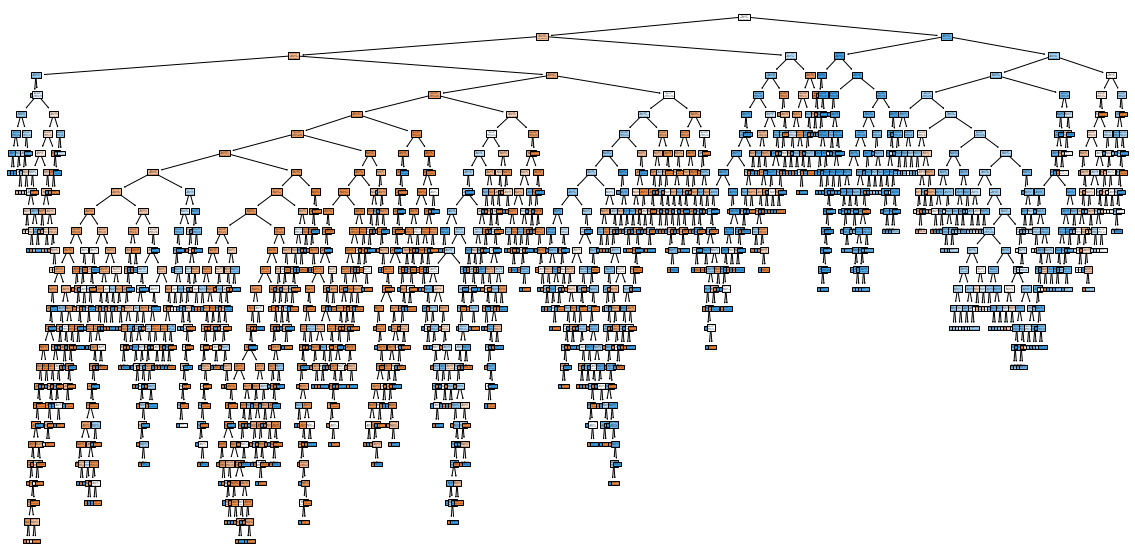

In [48]:
# Visualise the descision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True)
plt.show()

In [32]:
# Import an untrained set 
df_test = pd.read_csv("spaceship_titanic_test.csv")

In [33]:
df_test.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [34]:
# Drop PassengerId, Cabin , Name
df1 = df_test.drop(['PassengerId', 'Cabin', 'Name'],axis= 'columns')

In [35]:
df1.head(4)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0


In [36]:
# Fill null values in age dataset with mean value
df1['Age'] = df1['Age'].fillna(df1['Age'].mode()[0])


In [37]:
# Drop null values in all columns asides age.
df2 = df1.dropna()

In [38]:
df2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [39]:
df2.shape

(3508, 10)

In [40]:
df2.isnull().any().sum()

0

In [41]:

df2['CryoSleep'] = le.fit_transform(df2['CryoSleep'])
df2['VIP'] = le.fit_transform(df2['VIP'])

df2.head()

C:\Users\phili\AppData\Local\Temp\ipykernel_16604\928435251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CryoSleep'] = le.fit_transform(df2['CryoSleep'])
C:\Users\phili\AppData\Local\Temp\ipykernel_16604\928435251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['VIP'] = le.fit_transform(df2['VIP'])


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0
1,Earth,0,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,Europa,1,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0
3,Europa,0,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,Earth,0,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0


In [42]:
Homeplanet_encoded = pd.get_dummies(df2['HomePlanet'])
df2 = pd.concat([df2, Homeplanet_encoded], axis=1)

In [43]:
Destination_encoded =  pd.get_dummies(df2['Destination'])
df2 = pd.concat([df2, Destination_encoded], axis=1)

In [44]:
df3 = df2.drop(['Destination','HomePlanet'], axis = 'columns' )
df3.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1


In [45]:
predictions = gnb.predict(df3)
print(predictions)


[1 0 1 ... 1 1 1]
